In [1]:
from pathlib import Path
from brainlit.utils.swc import read_swc_offset
from brainlit.algorithms.trace_analysis.fit_spline import GeometricGraph
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from scipy.interpolate import splev

# Fitting Splines to Neuron Trace SWC Tutorial

## 1) Define variables
- `swc` the geometric graph
- `df,_,_,_` read the x, y, and z columns in swc file
- `neuron` define a new class inherited from `GeometricGraph` class
- `soma` define the data on the first run as the location of soma

In [22]:
brainlit_path=Path.cwd().parent.parent.parent
swc=Path.joinpath(brainlit_path,'data','data_octree','consensus-swcs','2018-08-01_G-002_consensus.swc')
df,_,_,_ = read_swc_offset(swc)
neuron = GeometricGraph(df=df)
soma = np.array([df.x[0], df.y[0], df.z[0]])


## 2) Plot the whole spline tree
- `spline_tree` use the `fit_spline_tree_invariant` to locate neuron branches

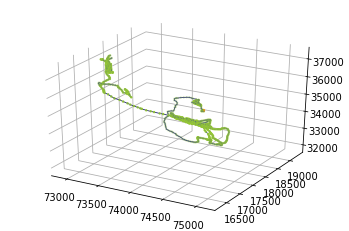

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
spline_tree = neuron.fit_spline_tree_invariant()
for node in spline_tree.nodes:
    path = spline_tree.nodes[node]["path"]
    locs = np.zeros((len(path),3))
    for p,point in enumerate(path):
        locs[p,:] = neuron.nodes[point]["loc"]
    ax.scatter(locs[:,0], locs[:,1], locs[:,2], marker=".",edgecolor='yellowgreen',linewidths=1,c='mediumblue', s=8)
    ax.plot(locs[:,0], locs[:,1], locs[:,2], linestyle='-',color='midnightblue',linewidth=0.8)
ax.scatter(soma[0],soma[1],soma[2], c='darkorange', s=5)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.grid(True)


plt.show()

##### Figure 1. The green dots indicate the locations of nodes on a tree, representing a neuron, and the single orange dot locates the position of the soma. Each nodes are connected with darkblue lines to illustrate the path of the neuron.

## 3) Plot each branch in separate plots

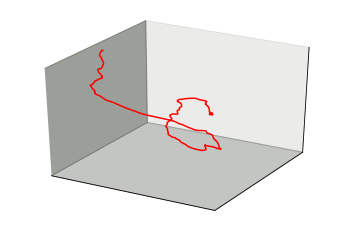

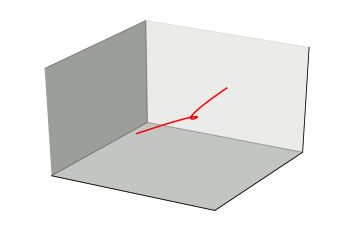

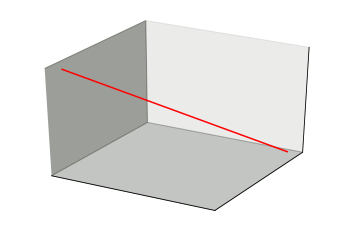

In [24]:
for node in spline_tree.nodes:
    path = spline_tree.nodes[node]["path"]
    locs = np.zeros((len(path),3))
    for p,point in enumerate(path):
        locs[p,:] = neuron.nodes[point]["loc"]

    spline = spline_tree.nodes[node]["spline"]
    u = spline[1]
    u = np.arange(u[0], u[-1]+0.9, 1)
    tck = spline[0]
    pts = splev(u, tck)
    
    
    if node < 3:
        fig = plt.figure()
        ax = fig.add_subplot(111,projection="3d")
        ax.plot(pts[0], pts[1], pts[2], 'red')
        ax.w_xaxis.set_pane_color((0.23, 0.25, 0.209, 0.5))
        ax.w_yaxis.set_pane_color((0.23, 0.25, 0.209, 0.1))
        ax.w_zaxis.set_pane_color((0.23, 0.25, 0.209, 0.3))
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        plt.axis('on')
        plt.show()

    

##### Figure 2. Examples of fitted splines to three different paths in a tree-like neuron.